# Coursework 1

## Question 1.a
Partition the provided face data into your training and testing data, in a way you choose.
Explain briefly the way you partitioned. Apply PCA to your training data i.e. compute the
eigenvectors and eigenvalues of the covariance matrix S=(1/N)AA T directly. Show and discuss, including: the eigenvectors and eigenvalues, the mean image, how many
eigenvectors are with non-zero eigenvalues, and how many eigenvectors are to be used
for face recognition. Give physical meanings behind your answers.

### Loading Face Dataset

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat( 'face(1).mat' )

mat_content

{'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

* __X__ contains the face data, where each column of __X__ is a one image from a total of 520 images.
* __l__ contains the label/face identity of each image

In [6]:
face_data = mat_content[ 'X' ]

print( face_data.shape )

(2576, 520)


Each image is a column that is 2576 values long.

In [7]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


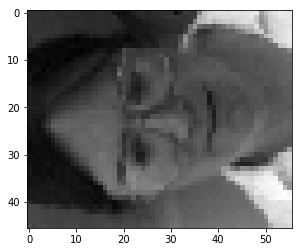

In [10]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

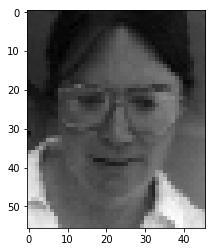

In [11]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [12]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


___
### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From [StackOverflow: Stratified Sampling Necessary?](https://datascience.stackexchange.com/questions/16265/is-stratified-sampling-necessary-random-forest-python)

In [18]:
print( face_data.shape )

(2576, 520)


#### Reshaping Data Set
Personally, I find it weird having each image in a column as opposed to a row. In my head, it makes much more sense of each image was in a row.

Tranpose the dataset, so we have __520__ rows, each one __2576__ long containing a face image.

In [20]:
face_data_row = face_data.T
print( face_data_row.shape )

(520, 2576)


In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data_row, test_size = 0.2, random_state = 42 )

In [29]:
print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[0] / face_data_row.shape[ 0 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[0] / face_data_row.shape[ 0 ]) )

Train Set: (416, 2576), Percentage: 80.0 %
Test  Set: (104, 2576), Percentage: 20.0 %


#### Dataset with labels
It might be a good idea to have the identity labels attached to the dataset

In [34]:
face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)


In [51]:
faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Labeled Shape: (2577, 520)


We now have a dataset __faceDataLabeled__ which contains the images with their identities in the bottom-most row.

In [64]:
rowLabel = faceDataLabeled[ 2576 ]

___
### Applying PCA 
We dont actually need class labels for PCA analysis, so we can use the **train_set** data set instead of the __faceDataLabeled__ data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [79]:
train_set[ : 1] # Access a row

print( train_set[ : , 1 ].shape ) # Access a column

(416,)


In [108]:
# Some dirty list comprehension below. Essentially iterate over the columns in the train_set and calculate
# mean for each column ( d means )
mean_face_row = np.array( [ [ np.mean( train_set[ : ,col ] ) for col in range( train_set.shape[ 1 ] ) ] ] ) 

print( 'Mean Vector: \n {}'.format( mean_face_row ) )

Mean Vector: 
 [[124.06971154 123.26682692 121.08413462 ...  85.33653846  83.44711538
   81.86298077]]


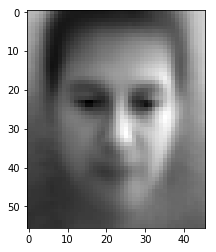

In [104]:
mean_face_img = np.reshape(mean_face_row,(46,56))

plt.imshow( mean_face_img.T, cmap = 'gist_gray')

#### Computing Covariance Matrix

In [114]:
cov_mat = np.cov( [ col for col in train_set.T ] )

print( 'Shape of cov_mat: {}'.format( cov_mat.shape ) )

Shape of cov_mat: (2576, 2576)


The covariance matrix contains the covariance between each pair of features, all 2576 of them, resulting in a $2576\times2576$ matrix. Along the main diagonal of the matrix, we have the variance of the feature.

The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. Also, the terms variance-covariance matrix and covariance matrix are used interchangeably. 

[Mean Vector and Covariance Matrix](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm)

#### Computing Eigenvectors and corresponding eigenvalues

In [115]:
eig_val, eig_vec = np.linalg.eig( cov_mat )